### All Imports

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Imputer

pd.set_option('display.max_columns', 100)

mpl.rc(group='figure', figsize=(10,8))
plt.style.use('seaborn')

### Loading dataset - train and test

In [2]:
filepath = 'dataset'
X_train = pd.read_csv(filepath + '/dengue_features_train.csv')
Y_train = pd.read_csv(filepath + '/dengue_labels_train.csv')
# only total_cases column
Y_train = pd.DataFrame(Y_train['total_cases'])
X_test = pd.read_csv(filepath + '/dengue_features_test.csv')

In [3]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
Y_train.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [7]:
X_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### Dropping features with more than 10% NaNs

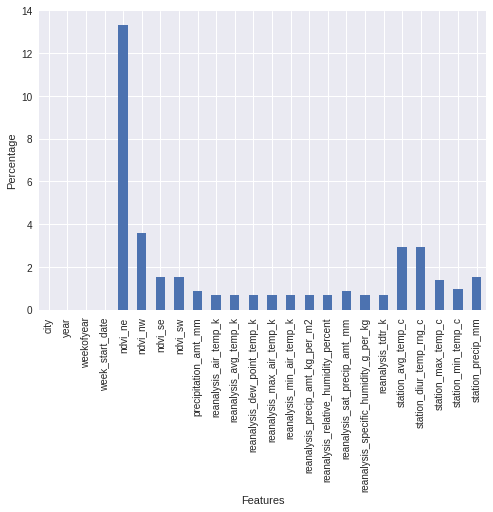

In [10]:
null_percentages = X_train.isnull().sum()/X_train.shape[0] * 100
null_percentages.plot.bar()
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

In [11]:
X_train = X_train.drop('ndvi_ne',axis=1)

### Variable type change week_start_date, Combining for correlation

In [13]:
# variable type change
X_train.week_start_date = pd.to_datetime(X_train.week_start_date)
X_test.week_start_date = pd.to_datetime(X_test.week_start_date)
# concat X and Y
XY_train = pd.concat([Y_train, X_train], axis=1)
# splitting into two cities
XY_sj = XY_train.loc[XY_train.city == 'sj', :]
XY_iq = XY_train.loc[XY_train.city == 'iq', :]

### Correlations between total_cases and the features for San Juan

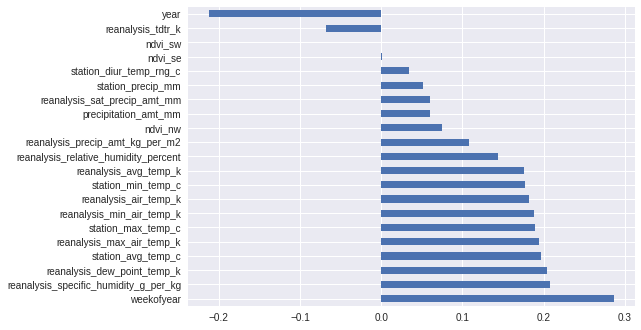

In [14]:
XY_sj.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

### Correlations between total_cases and the features for Iquitos

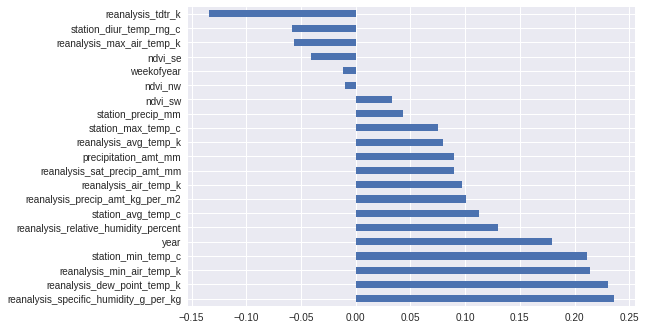

In [15]:

XY_iq.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

## San Juan

### Total Cases vs Week number

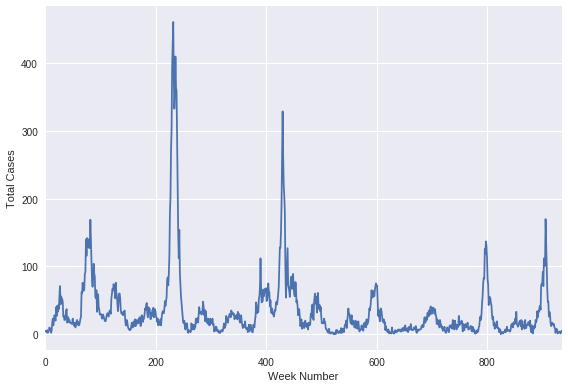

In [16]:
XY_sj.total_cases.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Total Cases')
plt.tight_layout()

## Specific Humidity, Dew Point Temperature, Average/Min/Max temperature, Precipitation peak every 52 weeks (similar to total_cases)

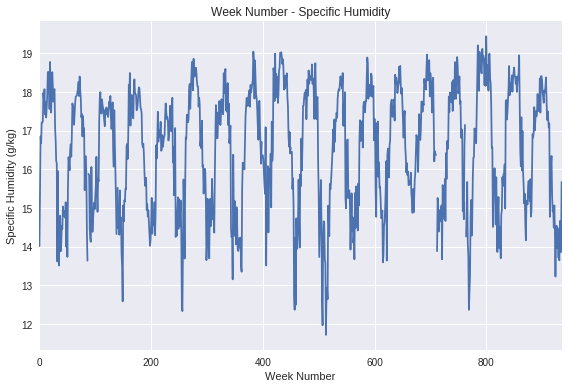

In [18]:
XY_sj.reanalysis_specific_humidity_g_per_kg.plot(kind='line')
plt.title('Week Number - Specific Humidity')
plt.xlabel('Week Number')
plt.ylabel('Specific Humidity (g/kg)')
plt.tight_layout()

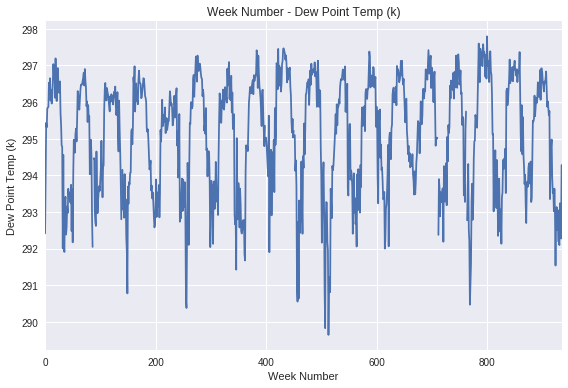

In [19]:
XY_sj.reanalysis_dew_point_temp_k.plot(kind='line')
plt.title('Week Number - Dew Point Temp (k)')
plt.xlabel('Week Number')
plt.ylabel('Dew Point Temp (k)')
plt.tight_layout()

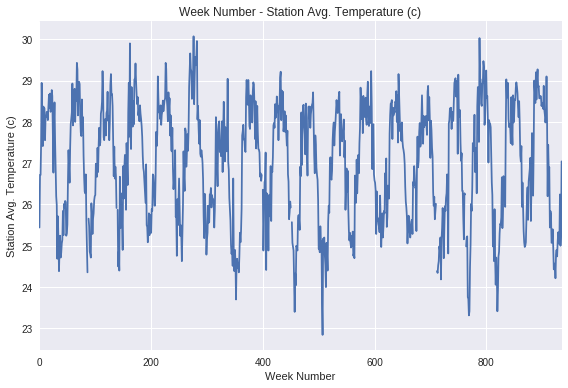

In [20]:
XY_sj.station_avg_temp_c.plot(kind='line')
plt.title('Week Number - Station Avg. Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Avg. Temperature (c)')
plt.tight_layout()

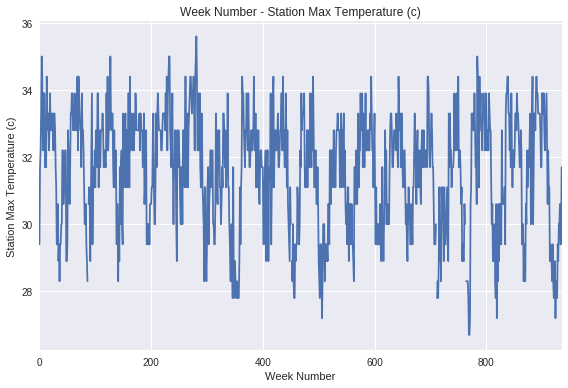

In [21]:
XY_sj.station_max_temp_c.plot(kind='line')
plt.title('Week Number - Station Max Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Max Temperature (c)')
plt.tight_layout()

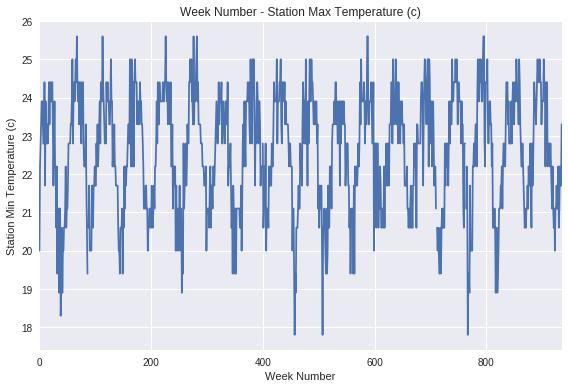

In [22]:
XY_sj.station_min_temp_c.plot(kind='line')
plt.title('Week Number - Station Max Temperature (c)')
plt.xlabel('Week Number')
plt.ylabel('Station Min Temperature (c)')
plt.tight_layout()

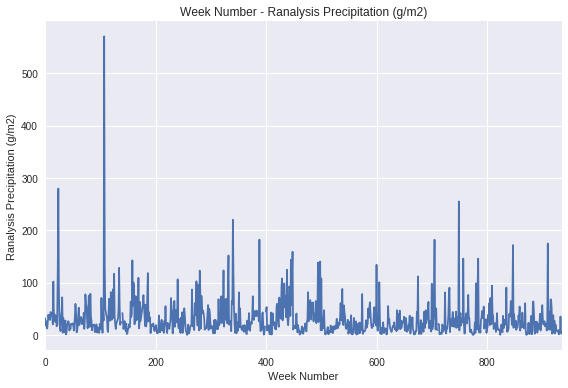

In [23]:
XY_sj.reanalysis_precip_amt_kg_per_m2.plot(kind='line')
plt.title('Week Number - Ranalysis Precipitation (g/m2)')
plt.xlabel('Week Number')
plt.ylabel('Ranalysis Precipitation (g/m2)')
plt.tight_layout()

In [24]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()

## Split the training and test datasets according to the city

In [25]:
X_train_sj = X_train.loc[X_train.city == 'sj', :].copy()
X_train_iq = X_train.loc[X_train.city == 'iq', :].copy()

Y_train_sj = Y_train.loc[X_train.city == 'sj', :].copy()
Y_train_iq = Y_train.loc[X_train.city == 'iq', :].copy()

X_test_sj = X_test.loc[X_test.city == 'sj', :].copy()
X_test_iq = X_test.loc[X_test.city == 'iq', :].copy()

## Drop unnecessary features - Feature Selection

In [26]:
keys = ['city', 'year', 'weekofyear']

all_features = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

features = ['reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg', 
            'station_avg_temp_c',  'station_max_temp_c', 'station_min_temp_c']

new_features = ['recent_mean_dew_point', 'recent_mean_spec_humid', 'recent_sum_precip']

time_series_features = ['week_start_date']

drop_features = list(set(all_features) - set(features) - set(keys) - set(time_series_features))

## Filling Missing Values

### 1. Fill using another feature with high correlation

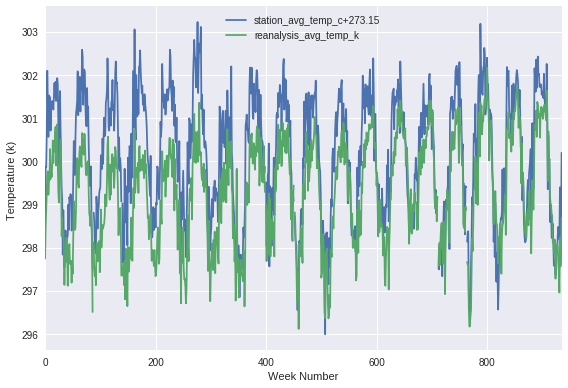

In [28]:
(XY_sj.station_avg_temp_c+273.15).plot(kind='line',label="station_avg_temp_c+273.15")
XY_sj.reanalysis_avg_temp_k.plot(kind='line',label="reanalysis_avg_temp_k")
# XY_sj.reanalysis_max_air_temp_k.plot(kind='line',label="reanalysis_max_air_temp_k")
# XY_sj.reanalysis_min_air_temp_k.plot(kind='line',label="reanalysis_min_air_temp_k")
plt.xlabel('Week Number')
plt.ylabel('Temperature (k) ')
plt.legend()
plt.tight_layout()

In [29]:
#to find the missing values in station_avg/min/max_temp_c -> use other reanalysis values.
def impute_redundant_features(df):
    df['reanalysis_avg_temp_c'] = df.reanalysis_avg_temp_k - 273.15
    df.reanalysis_avg_temp_c -= (df.reanalysis_avg_temp_c - df.station_avg_temp_c).mean()
    df.loc[df.station_avg_temp_c.isnull(), 'station_avg_temp_c'] = df.reanalysis_avg_temp_c

    df['reanalysis_max_air_temp_c'] = df.reanalysis_max_air_temp_k - 273.15
    df.reanalysis_max_air_temp_c -= (df.reanalysis_max_air_temp_c - df.station_max_temp_c).mean()
    df.loc[df.station_max_temp_c.isnull(), 'station_max_temp_c'] = df.reanalysis_max_air_temp_c

    df['reanalysis_min_air_temp_c'] = df.reanalysis_min_air_temp_k - 273.15
    df.reanalysis_min_air_temp_c -= (df.reanalysis_min_air_temp_c - df.station_min_temp_c).mean()
    df.loc[df.station_min_temp_c.isnull(), 'station_min_temp_c'] = df.reanalysis_min_air_temp_c
    
    # Drop the temporary columns
    df.drop(['reanalysis_avg_temp_c', 'reanalysis_max_air_temp_c', 
                  'reanalysis_min_air_temp_c'], axis=1, inplace=True)
    
    return df

In [30]:
X_train_sj = impute_redundant_features(X_train_sj)
X_train_iq = impute_redundant_features(X_train_iq)

X_test_sj = impute_redundant_features(X_test_sj)
X_test_iq = impute_redundant_features(X_test_iq)

### 2.  Fill using the mean value of the respective column

In [31]:
def impute_missing_values(df, imputer, features):
    imputer.fit(df[features])
    df[features] = imputer.transform(df[features])
    return df

In [32]:
imputer_sj = Imputer(strategy='mean')
X_train_sj = impute_missing_values(X_train_sj, imputer_sj,sj_features)
X_test_sj = impute_missing_values(X_test_sj, imputer_sj,sj_features)

imputer_iq = Imputer(strategy='mean')
X_train_iq = impute_missing_values(X_train_iq, imputer_iq,iq_features)
X_test_iq = impute_missing_values(X_test_iq, imputer_iq,iq_features)


NameError: name 'sj_features' is not defined

In [141]:
##Create new features considering time series analysis

In [142]:
def add_time_series_features(df, window):
    df.set_index('week_start_date', inplace=True)

    roll_df = df.rolling(window=window, min_periods=1)
    df['recent_mean_dew_point'] = roll_df.reanalysis_dew_point_temp_k.mean()
    df['recent_mean_spec_humid'] = roll_df.reanalysis_specific_humidity_g_per_kg.mean()
    df['recent_sum_precip'] = roll_df.reanalysis_precip_amt_kg_per_m2.sum()
    
    df.reset_index(inplace=True)    
    return df

In [143]:
X_train_sj = add_time_series_features(X_train_sj, window=100)
X_train_iq = add_time_series_features(X_train_iq, window=30)
X_test_sj = add_time_series_features(X_test_sj, window=100)
X_test_iq = add_time_series_features(X_test_iq, window=30)

print(f'X_train_sj: {X_train_sj.shape}')
print(f'X_train_iq: {X_train_iq.shape}')
print(f'X_test_sj: {X_test_sj.shape}')
print(f'X_test_iq: {X_test_iq.shape}')

X_train_sj: (936, 28)
X_train_iq: (520, 28)
X_test_sj: (260, 28)
X_test_iq: (156, 28)


In [144]:
##Drop unnecessary features

In [145]:
def drop_unnecessary_features(df):
    df.drop(drop_features, axis=1, inplace=True)
    df.drop(time_series_features, axis=1, inplace=True)
    return df

In [146]:
X_train_sj = drop_unnecessary_features(X_train_sj)
X_train_iq = drop_unnecessary_features(X_train_iq)
X_test_sj = drop_unnecessary_features(X_test_sj)
X_test_iq = drop_unnecessary_features(X_test_iq)

print(f'X_train_sj: {X_train_sj.shape}')
print(f'X_train_iq: {X_train_iq.shape}')
print(f'X_test_sj: {X_test_sj.shape}')
print(f'X_test_iq: {X_test_iq.shape}')

X_train_sj: (936, 13)
X_train_iq: (520, 13)
X_test_sj: (260, 13)
X_test_iq: (156, 13)


In [147]:
##Normalize features

In [148]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [149]:
features_to_normalize = features + new_features

X_train_sj[features_to_normalize] = X_train_sj[features_to_normalize].apply(normalize, axis=0)
X_train_iq[features_to_normalize] = X_train_iq[features_to_normalize].apply(normalize, axis=0)
X_test_sj[features_to_normalize] = X_test_sj[features_to_normalize].apply(normalize, axis=0)
X_test_iq[features_to_normalize] = X_test_iq[features_to_normalize].apply(normalize, axis=0)

In [150]:
##Combine two datasets and restore to original values

In [151]:
X_train = pd.concat([X_train_sj, X_train_iq], axis=0)
X_train.set_index('index', inplace=True)
X_train.head()

,city,year,weekofyear,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,recent_mean_dew_point,recent_mean_spec_humid,recent_sum_precip
index,,,,,,,,,,,,
0,sj,1990,18,-1.722306,0.043211,-1.632200,-1.108260,-1.289862,-1.732105,-9.463572,-8.929043,-3.733679
1,sj,1990,19,-0.740042,-0.352694,-0.758112,-0.207129,0.053770,-0.266841,-6.794441,-6.566003,-3.710537
2,sj,1990,20,0.207532,-0.122923,0.190347,-0.207129,0.345864,0.132776,-4.188151,-4.068925,-3.676869
3,sj,1990,21,0.128111,-0.466453,0.077414,0.329500,0.988471,0.465791,-2.992913,-2.973040,-3.658939
4,sj,1990,22,0.454924,-0.514322,0.422642,1.372383,1.981591,0.865408,-1.920547,-1.942189,-3.643202


In [152]:
##Split train dataset according to the city

In [154]:
X_sj, y_sj = X_train.loc[X_train.city == 'sj', :], Y_train.loc[X_train.city == 'sj', :]
X_iq, y_iq = X_train.loc[X_train.city == 'iq', :], Y_train.loc[X_train.city == 'iq', :]
print(f'X_sj: {X_sj.shape}')
print(f'y_sj: {y_sj.shape}')
print(f'X_iq: {X_iq.shape}')
print(f'y_iq: {y_iq.shape}')

X_sj: (936, 12)
y_sj: (936, 1)
X_iq: (520, 12)
y_iq: (520, 1)


In [155]:
##Split into training and cross validation sets

In [156]:
X_train_sj, X_cross_sj, y_train_sj, y_cross_sj = train_test_split(X_sj, 
                                                                  y_sj,
                                                                  test_size=0.2,
                                                                  stratify=X_sj.weekofyear)

print(f'X_train_sj: {X_train_sj.shape}')
print(f'y_train_sj: {y_train_sj.shape}')
print(f'X_cross_sj: {X_cross_sj.shape}')
print(f'y_cross_sj: {y_cross_sj.shape}')

X_train_sj: (748, 12)
y_train_sj: (748, 1)
X_cross_sj: (188, 12)
y_cross_sj: (188, 1)


In [157]:
X_train_iq, X_cross_iq, y_train_iq, y_cross_iq = train_test_split(X_iq, 
                                                                  y_iq, 
                                                                  test_size=0.2,
                                                                  stratify=X_iq.weekofyear)

print(f'X_train_iq: {X_train_iq.shape}')
print(f'y_train_iq: {y_train_iq.shape}')
print(f'X_cross_iq: {X_cross_iq.shape}')
print(f'y_cross_iq: {y_cross_iq.shape}')

X_train_iq: (416, 12)
y_train_iq: (416, 1)
X_cross_iq: (104, 12)
y_cross_iq: (104, 1)
